# Testing HotVis on the highschool graph

Some functions are commented out because my computer does not have enough power to run them.

In [1]:
import csv
from HotVisFunctions import *
from SGDStressFunctions import *
import pandas as pd

/opt/conda/lib/python3.11/site-packages/_distutils_hack/__init__.py:26: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [2]:
# choose only first 8th of timesteps
highschool = pd.read_csv('graphs/Highschool/proximity/edges.csv')
t_min = highschool['t'].min()
t_max = highschool['t'].max()
eight_fraction = (t_max - t_min) * 0.01

highschool_shortened = highschool[highschool['t'] <= (t_min + eight_fraction)]
highschool_shortened.to_csv('graphs/Highschool/proximity/edges_shortened.csv')

In [3]:
# load graph
highschool_graph = pp.io.read_csv_temporal_graph('graphs/Highschool/proximity/edges_shortened.csv', is_undirected = True, timestamp_format='%S')
# load metadata
meta_data = pd.read_csv("graphs/Highschool/proximity/nodes.csv")


Every class gets its own color.

In [4]:
print(meta_data["class"].unique())

['2BIO3' 'PC*' '2BIO2' 'PSI*' 'PC' 'MP*1' 'MP' '2BIO1' 'MP*2']


In [5]:
colors = {}
color_map = {'2BIO3': 'yellow', 'PC*': 'green', '2BIO2': 'blue', 'PSI*':'pink', 'PC':'gray', 'MP*1':'black', 'MP':'red', '2BIO1':'purple', 'MP*2':'orange'}
for index, row in meta_data.iterrows():
        colors[f"{row['index']}"] = color_map[row['class']]
style = {}
style['node_color'] = colors
style['node_size'] = 10
style['edge_size'] = 0.1
style['edge_opacity'] = 0


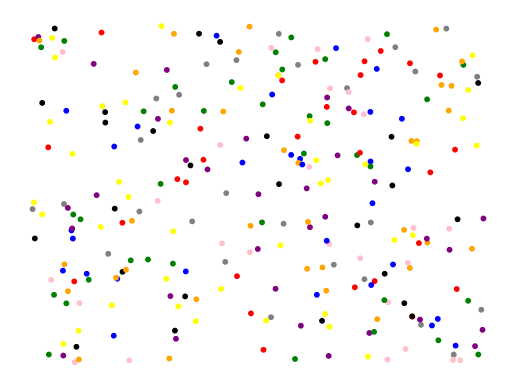

In [6]:
pp.plot(highschool_graph.to_static_graph(), backend='matplotlib' ,**style)

In [7]:
layout_2 =  HotVis(highschool_graph, 2, 50000, 75, alpha= torch.tensor([1, 0.5]), force=10)
layout_3 =  HotVis(highschool_graph, 3, 50000, 75, alpha= torch.tensor([1, 0.5, 0.3]), force=10)
#layout_5 =  HotVis(highschool_graph, 5, 50000, 75, alpha= torch.tensor([1, 0.5, 0.3, 0.25, 0.2]), force=10)


100%|██████████| 29/29 [00:00<00:00, 188.45it/s]
/workspaces/pathpyG/src/pathpyG/visualisations/Project_JS/HotVisFunctions.py:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  edge_index = torch.tensor(ho_graph.data.edge_index, device=device, dtype=torch.long)
/workspaces/pathpyG/src/pathpyG/visualisations/Project_JS/HotVisFunctions.py:54: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  node_sequence = torch.tensor(ho_graph.data.node_sequence, device=device, dtype=torch.long)
100%|██████████| 50000/50000 [00:59<00:00, 835.74it/s]


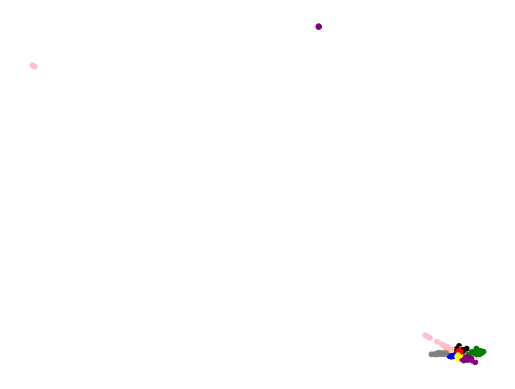

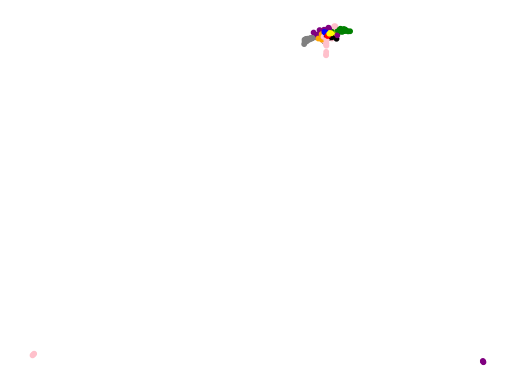

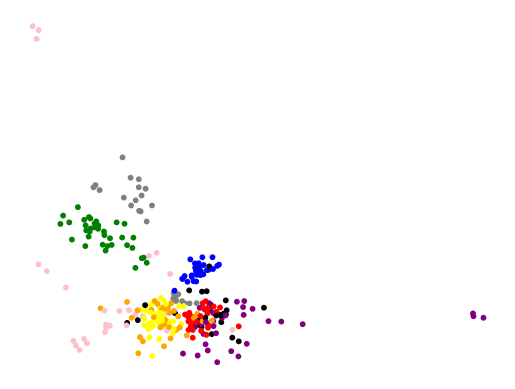

In [8]:
pp.plot(highschool_graph.to_static_graph(), layout=layout_2, backend='matplotlib' ,**style)
pp.plot(highschool_graph.to_static_graph(), layout=layout_3, backend='matplotlib' ,**style)
#pp.plot(highschool_graph.to_static_graph(), layout=layout_5, backend='matplotlib' ,**style)
pp.plot(highschool_graph.to_static_graph(), layout="fr", backend='matplotlib' ,**style)

In [9]:
clusters = meta_data.groupby('class')['index'].apply(list).values

clusters = [[str(i) for i in cluster] for cluster in clusters]
# filter nodes, wich doesn't occure in graph
valid_nodes = set(highschool_graph.mapping.node_ids)
clusters = [list(filter(lambda node: node in set(highschool_graph.mapping.node_ids), cluster)) for cluster in clusters]
# filter empty lists
clusters = [lst for lst in clusters if lst]

print(clusters)


[['26', '29', '40', '47', '52', '65', '142', '148', '155', '165', '168', '169', '174', '175', '183', '190', '191', '212', '218', '222', '223', '224', '231', '249', '255', '256', '257', '279', '280', '284', '288', '289'], ['2', '9', '10', '17', '23', '53', '58', '61', '63', '86', '103', '107', '118', '121', '124', '127', '130', '134', '143', '149', '154', '164', '170', '185', '193', '204', '230', '236', '265', '266'], ['0', '14', '21', '25', '27', '37', '39', '43', '44', '46', '50', '60', '66', '72', '73', '76', '77', '91', '98', '101', '105', '109', '111', '129', '132', '135', '147', '158', '180', '194', '200', '209', '217', '219', '241', '242', '261', '264', '268', '277'], ['13', '15', '20', '55', '56', '75', '83', '84', '94', '95', '145', '163', '184', '188', '196', '197', '198', '199', '203', '211', '214', '215', '221', '225', '226', '227', '235', '258', '260', '262'], ['7', '38', '89', '110', '113', '114', '115', '117', '133', '136', '138', '141', '152', '166', '173', '186', '187',

In [10]:
print(cluster_distance_ratio(highschool_graph, clusters, layout_2))
print(cluster_distance_ratio(highschool_graph, clusters, layout_3))
#print(cluster_distance_ratio(highschool_graph, clusters, layout_5))

tensor([1.7417, 0.0470, 0.0613, 0.0551, 0.1311, 0.1097, 0.3043, 0.1128, 1.3212])
tensor([1.6384, 0.0346, 0.0432, 0.0432, 0.1300, 0.1047, 0.3583, 0.1026, 1.3817])


In [11]:
print(edge_crossing(highschool_graph, layout_2))
print(edge_crossing(highschool_graph, layout_3))
#print(edge_crossing(highschool_graph, layout_5))

tensor(6054.)
tensor(6507.)


In [ ]:
#print(causal_path_dispersion(highschool_graph, layout_2, 80))
#print(causal_path_dispersion(highschool_graph, layout_3, 80))
#print(causal_path_dispersion(highschool_graph, layout_5, 80))

In [13]:
print(closeness_eccentricity(highschool_graph, layout_2, 80, 0.1))
#print(closeness_eccentricity(highschool_graph, layout_3, 80, 0.1))
#print(closeness_eccentricity(highschool_graph, layout_5, 80, 0.1))

100%|██████████| 141/141 [01:57<00:00,  1.20it/s]


tensor(0.5156, dtype=torch.float64)


/workspaces/pathpyG/src/pathpyG/visualisations/Project_JS/HotVisFunctions.py:215: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  path_indices = torch.tensor(paths.mapping.to_idxs(path), device=device)


: 